# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [2]:
import zipfile 
from IPython.display import display
from PIL import Image
from PIL import ImageDraw
import PIL
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!
from kraken import pageseg

In [3]:
# Unused in this project
def cropnOCR(image,bbox):
    title_image=image.crop(bbox)
    # Now lets display it and pull out the text
    #display(title_image)
    word = (pytesseract.image_to_string(title_image))
    return word

In [4]:
# Unused in this project due to high runtime 
# kraken was used here
def getTextKraken(imfile):
    image=Image.open(imfile)
    words=[]
    drawing_object=ImageDraw.Draw(image)
    # Lets now convert it to black and white and segment it up into lines with kraken
    bounding_boxes=pageseg.segment(image.convert('1'))['boxes']
    for bbox in bounding_boxes:
        # An just draw a nice rectangle
        drawing_object.rectangle(bbox, fill = None, outline ='red')
        # And to make it easy, lets return the image object
        word = cropnOCR(image,bbox)
        if word !='':
            words.append(word)
    display(image)
    return(words)

In [5]:
# Used for getting the text in the image
def getText(imfile):
    image=Image.open(imfile)
    words=[]
    drawing_object=ImageDraw.Draw(image)
    allWords = (pytesseract.image_to_string(image))
    # print(allWords)
    for word in allWords.split():
        word = word.strip().strip(',').strip('/').strip('(').strip(')').strip('-').strip(';').strip(':')
        words.append(word.lower())
    return(list(set(words)))

## Testing
#getText('readonly/unsharp.jpg')
#getText('readonly/sample_img/img1.png')
#getText('readonly/sample_img/img2.png')
#getText('readonly/sample_img/img3.png')
#getText('readonly/small_img/a-1.png')
#getText('readonly/small_img/a-2.png')
#getText('readonly/small_img/a-3.png')

In [6]:
# Creating a contact sheet with all the faces in the image
def getFaceBoxes(imfile):
    image=Image.open(imfile)

    img = np.array(image)
    faceBBox =[]
    #  Convert it to grayscale using the cvtColor image
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # The next step is the face_cascade classifier. 
    faces = face_cascade.detectMultiScale(gray,scaleFactor =1.30,minNeighbors=9,minSize=(5, 5))
    pil_img=Image.fromarray(gray,mode="L")
    # Setup  drawing context
    drawing=ImageDraw.Draw(pil_img)
    try:
        rectangles=faces.tolist()
    except :
        return None
    
    for rec in rectangles:
        drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white")
        # And display
        bbox = ((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]))
        faceBBox.append(bbox)

    contact_sheet=PIL.Image.new("RGB", (1000,200))
    x=0
    y=0
    
    for bbox in faceBBox:
        img=image.crop(bbox)
        img=img.resize((100,100))
        contact_sheet.paste(img, (x, y) )
        if x+img.width == contact_sheet.width:
            x=0
            y=y+img.height
        else:
            x=x+img.width
    #display(contact_sheet)
    
    
    #display(pil_img)
    return contact_sheet

#cs = getFaceBoxes('readonly/msi_recruitment.jpg')
#cs = getFaceBoxes('readonly/small_img/a-2.png')
#cs = getFaceBoxes('readonly/small_img/a-3.png')
#cs = getFaceBoxes('readonly/small_img/a-0.png')
#cs = getFaceBoxes('readonly/small_img/a-1.png')
#display (cs)

In [7]:
# Create a python list of tuples with the file name , word in the image and the contact sheet with faces
def createDataStructure(zipFilePath):
    imageData = []
    with zipfile.ZipFile(zipFilePath) as smallZip:
        for file in smallZip.infolist():
            if '__MACOSX' in file.filename:
                continue
            with smallZip.open(file) as imfile:
                image=Image.open(imfile)
                imageData.append((file.filename,getText(imfile),getFaceBoxes(imfile)))
                #break
    return imageData

In [8]:
# Used for quick debugging
smallImgDict = createDataStructure('readonly/small_img.zip')

In [9]:
# Used for final result
imgDict = createDataStructure('readonly/images.zip')

Enter the search term: mark
Results found in file a-0.png


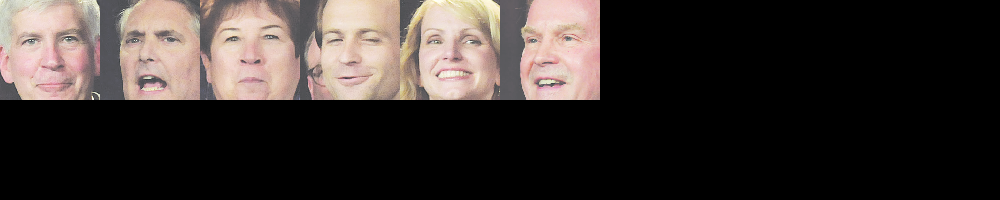

Results found in file a-1.png


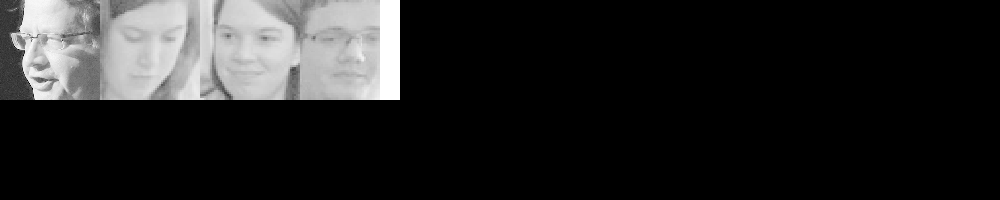

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-2.png


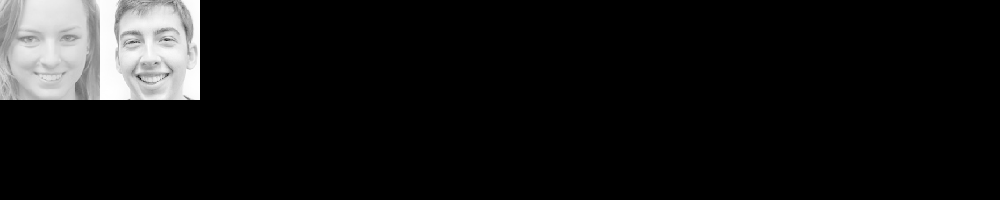

Results found in file a-3.png


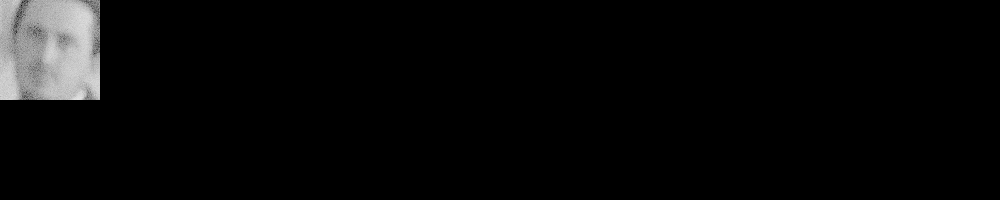

Results found in file a-5.png


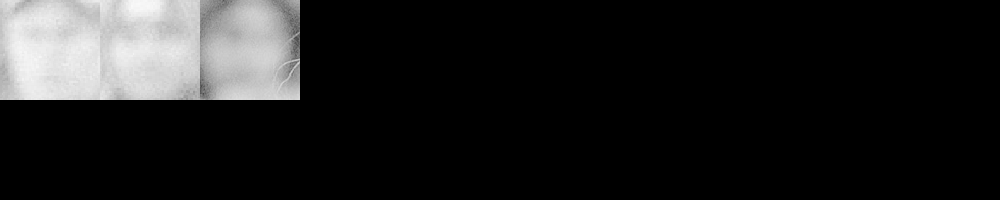

Results found in file a-8.png
But there were no faces in that file!
Results found in file a-9.png


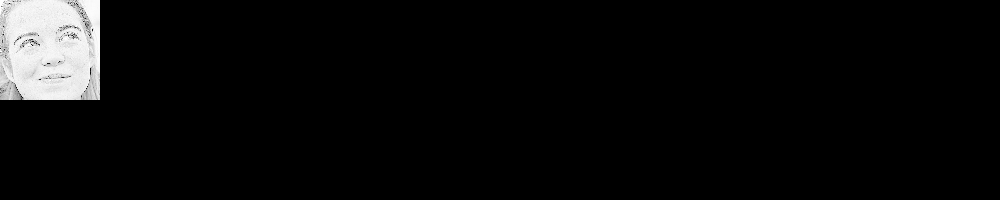

In [14]:
# Receive the search term from the user and display the contact sheet with faces
keyword = input("Enter the search term: ")
keyword = keyword.lower()
for item in imgDict:
    name = item[0]
    if keyword in item[1]:   
        print('Results found in file {}'.format(name))
        if item[2] == None:
            print("But there were no faces in that file!")
        else:
            display (item[2])